# Imports

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load data

In [168]:
df = pd.read_csv("cardiotocography_v2.csv")
print(len(df))

2126


# Handle missing data

## Drop rows with missing data

In [169]:
df_clean = df.dropna()
print(len(df_clean))

743


We're losing to much data - dropping rows is not the solution

## KNN imputation

KNN preserves local patterns which is crucial for good split decisions in context of decision trees.<br>
It maintains feature relationships.<br>
Because of small size of dataset it won't be cost to calcualate missing values.<br>
One downside of KNN imputation is that it will reduce the skewness and kurtosis of features but not so much drastically as mean imputation<br>

The alternative would be:
- using median imputation to preserve skewness and kurtosis of features
- using mean imputation for features with normal distribution

In [170]:
df_filled = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)

Handle features with integer values (*tendency*, *Nmax*, *Nzeros*)

In [171]:
integer_values_imputed = knn_imputer.fit_transform(df_filled[['Tendency', 'Nmax', 'Nzeros']])

integer_values_imputed = np.round(integer_values_imputed).astype(int)

df_filled[['Tendency', 'Nmax', 'Nzeros']] = integer_values_imputed

In [172]:


feature_cols = [col for col in df.columns if col != 'CLASS']
df_filled[feature_cols] = knn_imputer.fit_transform(df_filled[feature_cols])
df_filled

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120.0,0.000,0.000,0.000,0.0000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,0.0,9
1,132.0,0.006,0.000,0.006,0.0030,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6
2,123.4,0.003,0.000,0.008,0.0018,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,0.0,133.8,135.0,138.0,13.0,0.0,6
3,134.0,0.003,0.000,0.008,0.0030,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6
4,132.0,0.007,0.000,0.008,0.0000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.0000,0.0,0.0,47.8,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,5
2122,140.0,0.001,0.000,0.007,0.0000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,5
2123,140.0,0.002,0.000,0.007,0.0000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,3.0,0.0,153.0,148.0,152.0,4.0,1.0,5
2124,140.0,0.001,0.000,0.006,0.0000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,5


Save filled data to file

In [173]:
df_filled.to_csv('./raw_filled_data.csv', index=False)

In [174]:
df = pd.read_csv('./raw_filled_data.csv')

Since skewed features properly reflect nature of the phenomenon we don't need to transform them.

# Standardizing and normalizing data

## Standardize

Transforms your data to have a mean of 0 and a standard deviation of 1. <br>
The formula is:<br>
z = (x - μ) / σ<br>
Where μ is the mean and σ is the standard deviation. 

In [175]:
stder = StandardScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

standardized_data = stder.fit_transform(X.copy())

df_standardized_features = pd.DataFrame(standardized_data, columns=X.columns)

df_standardized = pd.concat([df_standardized_features, y], axis=1)

df_standardized.to_csv("./standardized_data.csv", index=False)


## Normalize

Rescales data to fit within a specific range, typically [0,1]. <br>
The formula is:<br>
x_normalized = (x - min) / (max - min)

In [176]:
normalizer = MinMaxScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

normalized_data = normalizer.fit_transform(X.copy())

df_normalized_features = pd.DataFrame(normalized_data, columns=X.columns)

df_normalized = pd.concat([df_normalized_features, y], axis=1)

df_normalized.to_csv("./normalized_data.csv", index=False)

In [177]:
def analyze_feature_distributions(df: pd.DataFrame):
    """
    Analyze individual feature distributions to understand data characteristics.
    This helps identify skewness, outliers, and potential transformation needs.
    """
    print("📊 Analyzing feature distributions...")

    # Select subset of features for visualization (to avoid overcrowding)

    fig, axes = plt.subplots(5, 5, figsize=(32, 16))
    axes = axes.ravel()

    for i, col in enumerate(feature_cols):
        if i < len(axes):
            # Histogram with KDE
            df[col].hist(bins=30, alpha=0.7, ax=axes[i])
            axes[i].set_title(f"{col}\nSkew: {df[col].skew():.2f}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel("Frequency")

    # Hide unused subplots
    for i in range(len(feature_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Identify highly skewed features
    skewed_features = []
    for col in feature_cols:
        skewness = abs(df[col].skew())
        if skewness > 1:  # Threshold for high skewness
            skewed_features.append((col, df[col].skew()))

    if skewed_features:
        print("\n⚠️  Highly skewed features (|skewness| > 1):")
        for feature, skew_val in skewed_features:
            print(f"  {feature}: {skew_val:.3f}")

📊 Analyzing feature distributions...


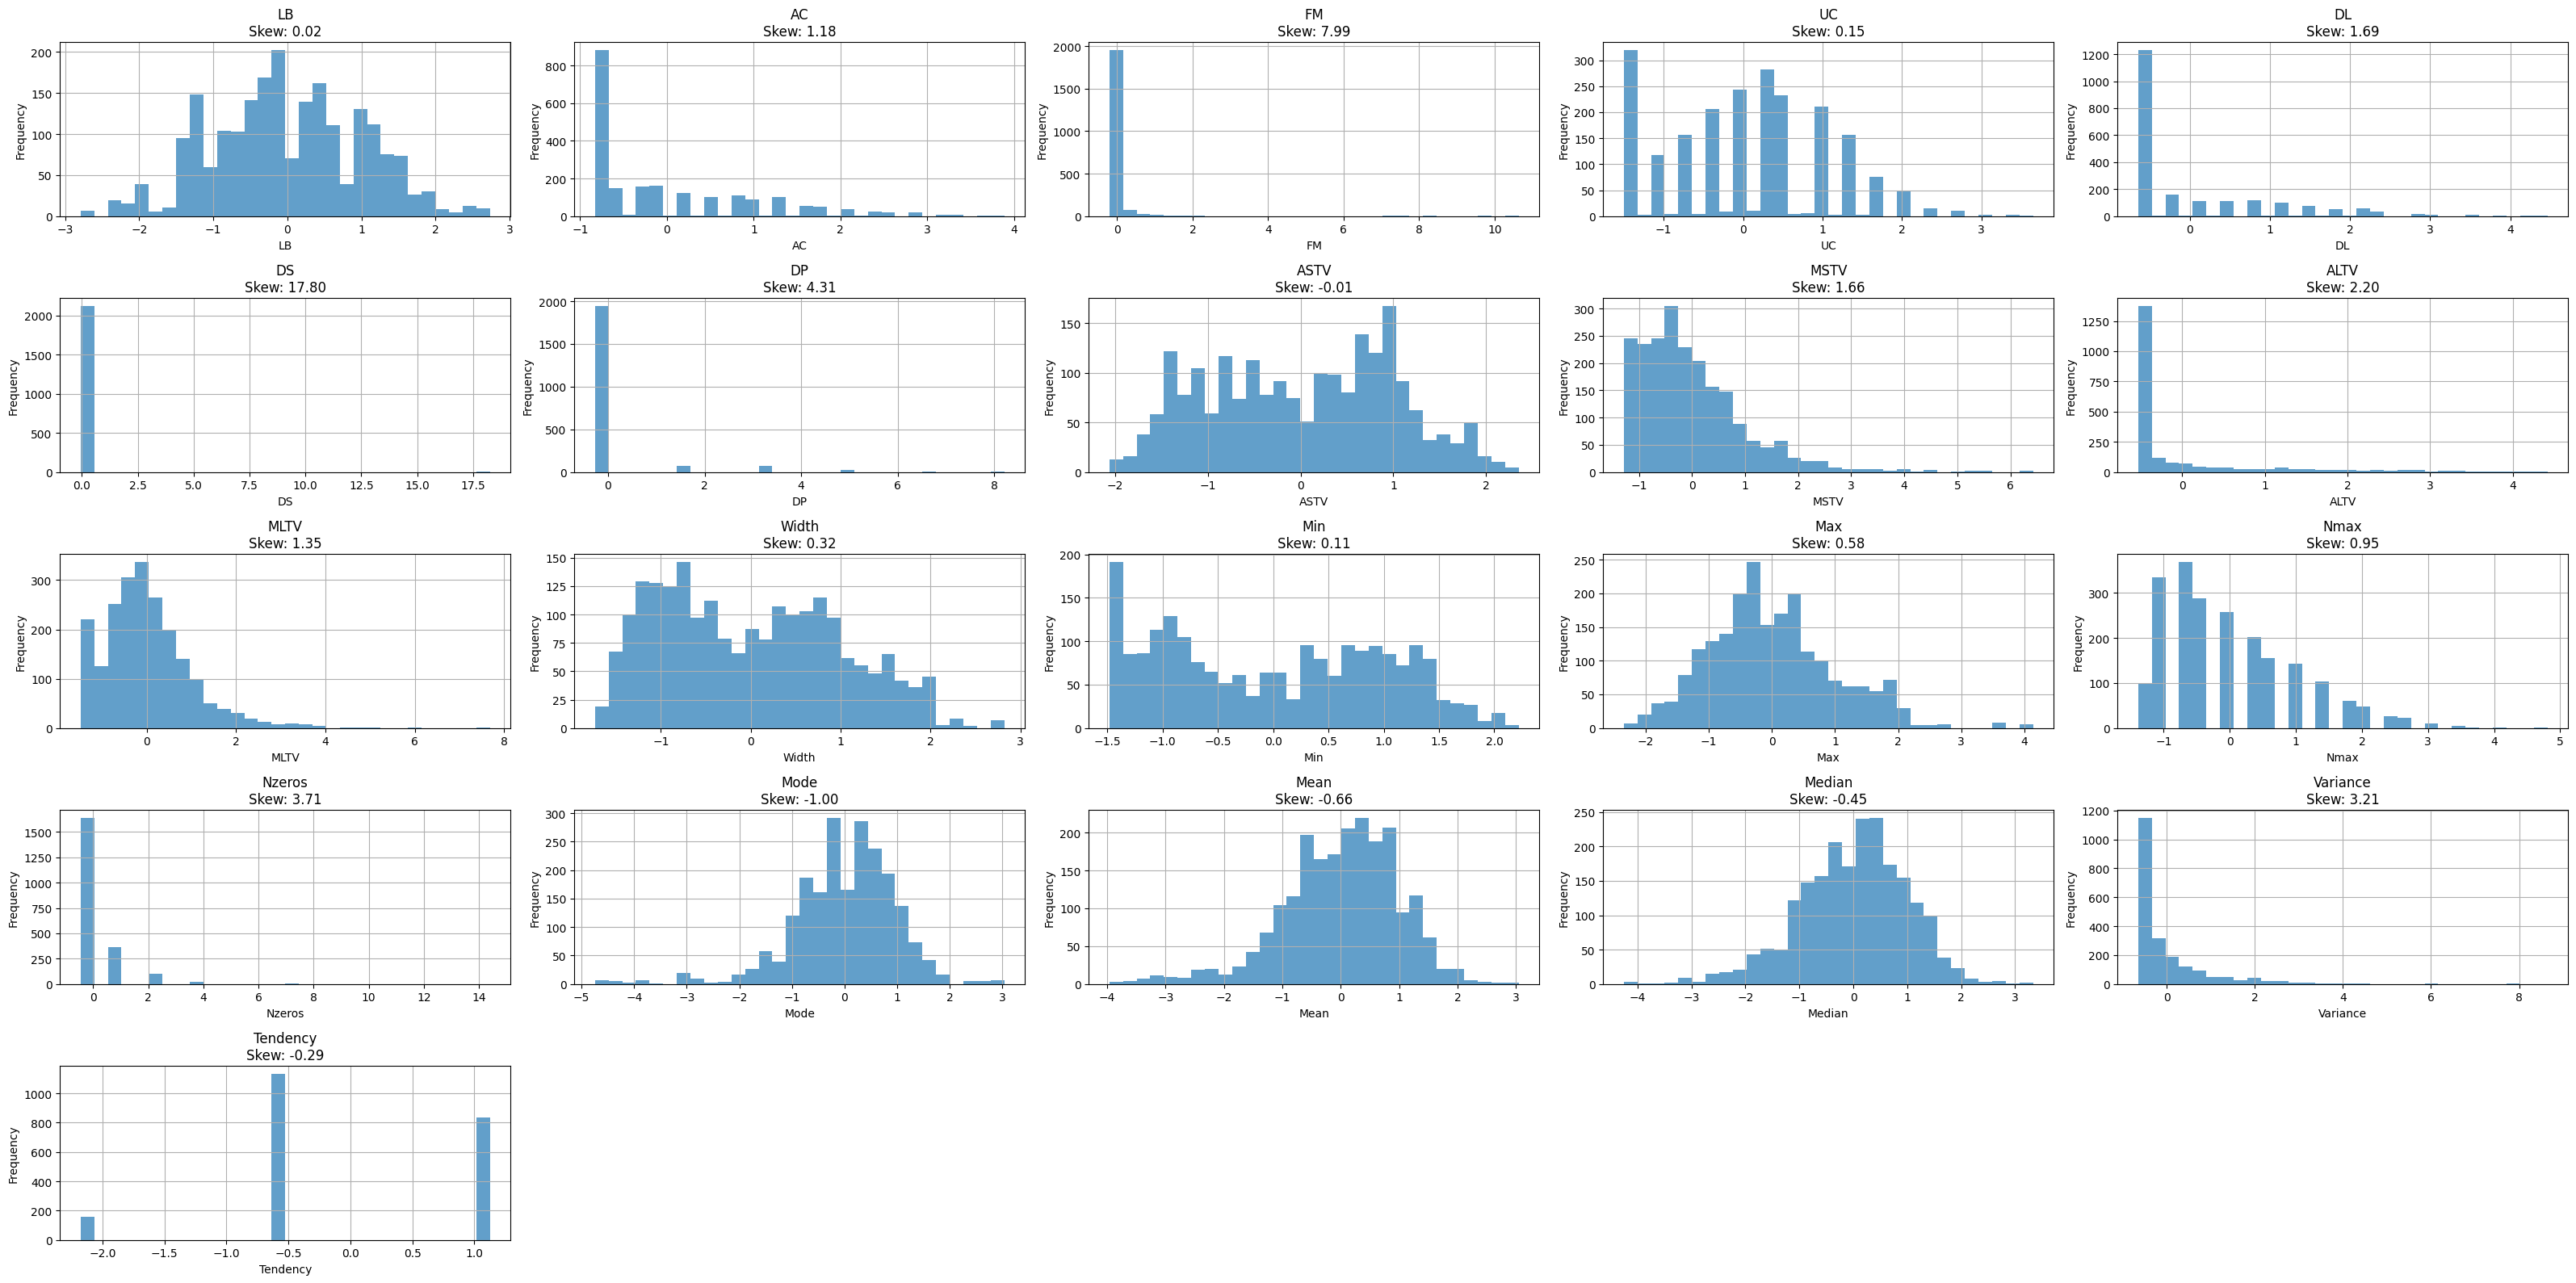


⚠️  Highly skewed features (|skewness| > 1):
  AC: 1.180
  FM: 7.989
  DL: 1.692
  DS: 17.798
  DP: 4.311
  MSTV: 1.660
  ALTV: 2.200
  MLTV: 1.351
  Nzeros: 3.713
  Mode: -1.001
  Variance: 3.214


In [178]:
analyze_feature_distributions(df_standarized)


Split data into X set (features) and Y set (target)